# Pymaceuticals Inc.

Analysis

-The correlation between mouse weight and average tumor volume is 0.84. This is a strong positive correlation, it is shown that  as the weight of the mouse increases so does the tumor volume. 
-The treatments Capomulin and Ramicane reduce the size of tumors better overall, whereas Propriva was the least. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how= 'outer')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice =combined_df["Mouse ID"].nunique()
number_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID= combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= combined_df[combined_df['Mouse ID'].isin(duplicate_mice_ID)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice= clean_df["Mouse ID"].nunique()
cleaned_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
variance=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
standard_deviation=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
SEM=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()
 
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = pd.DataFrame({"Mean Tumor Volume":mean,
                             "Median Tumor Volume":median,
                             "Tumor Volume Variance":variance,
                             "Tumor Volume Std. Dev.":standard_deviation,
                             "Tumor Volume Std. Err.": SEM})
#Display
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby("Drug Regimen").agg({
    'Tumor Volume (mm3)':["mean","median","var","std","sem"]
})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
mice= clean_df["Drug Regimen"].value_counts()
mice

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, '# of Observed Mouse Timepoints')

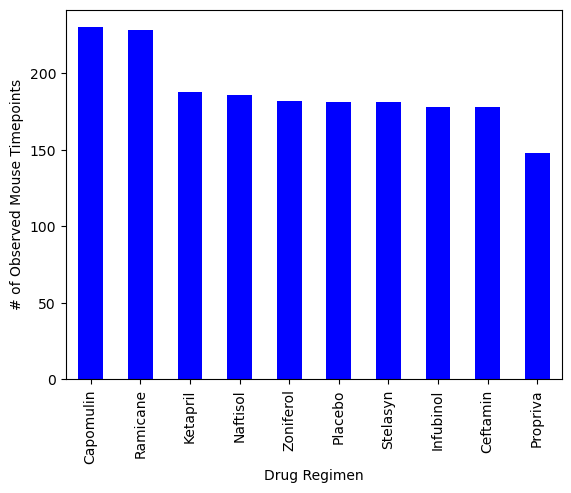

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_plot = mice.plot.bar(color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

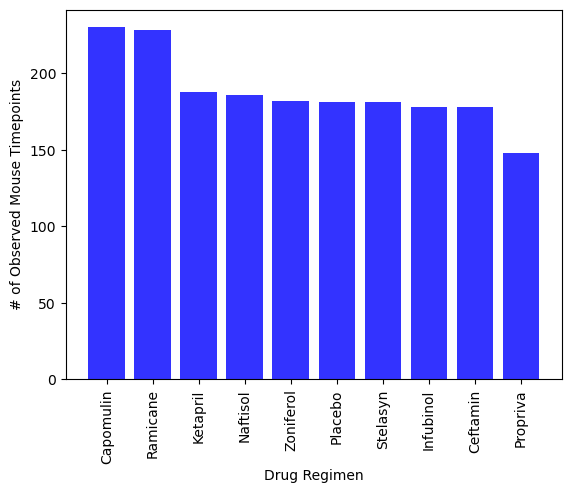

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice.index.values
y_axis = mice.values

plt.bar(x_axis, y_axis, color ='b', alpha=0.8, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

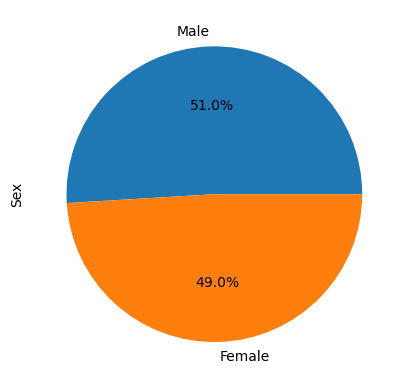

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genders= clean_df["Sex"].value_counts()
genders.plot.pie(autopct= "%1.1f%%")
plt.show()

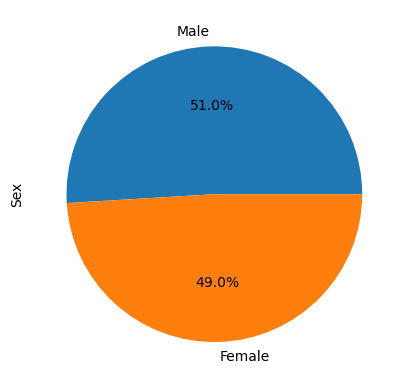

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.0, 51.0]
plot = genders.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

max_timepoint=clean_df.groupby(["Mouse ID"]).max()["Timepoint"]
max_timepoint=max_timepoint.reset_index()
drugs=max_timepoint.merge(clean_df,on=["Mouse ID", "Timepoint"], how="left")
drugs.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = drugs.loc[drugs["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles= tumor_vol.quantile([.25,.5,.75])
    upper= quartiles[.75]
    lower=quartiles[.25]
    IQR=upper-lower
    upperb=upper+(1.5*IQR)
    lowerb=lower-(1.5*IQR)
    outliers=tumor_vol.loc[(tumor_vol<lowerb)|(tumor_vol>upperb)]
    print(f"{treatment} {outliers}")


Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


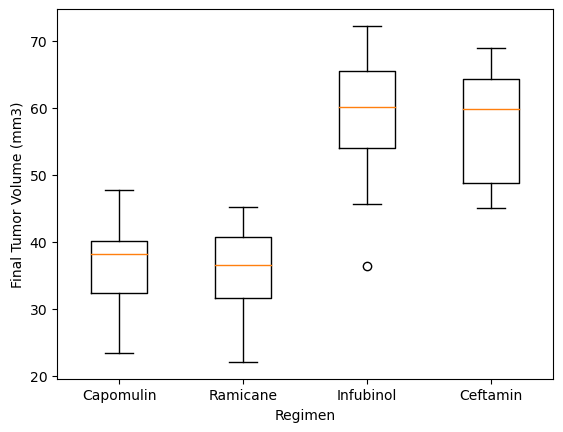

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1 = plt.subplots
plt.xlabel("Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.boxplot(tumor_vol_data, labels=treatments)
plt.show()

In [17]:
cap_df =clean_df.loc[clean_df["Drug Regimen"]== "Capomulin",:]
cap_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [18]:
capomulin= cap_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol= pd.DataFrame(cap_df)
capmerge=pd.merge(capomulin_vol, clean_df, on = ("Mouse ID", "Timepoint"), how="left")
capmerge.head()

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,s185,Capomulin,Female,3,17,0,45.000000,0,Capomulin,Female,3,17,45.000000,0
1,s185,Capomulin,Female,3,17,5,43.878496,0,Capomulin,Female,3,17,43.878496,0
2,s185,Capomulin,Female,3,17,10,37.614948,0,Capomulin,Female,3,17,37.614948,0
3,s185,Capomulin,Female,3,17,15,38.177232,0,Capomulin,Female,3,17,38.177232,0
4,s185,Capomulin,Female,3,17,20,36.866876,0,Capomulin,Female,3,17,36.866876,0


## Line and Scatter Plots

In [19]:
cap_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [20]:
lineplot_df = cap_df.loc[cap_df["Mouse ID"] == "l509",:]
lineplot_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


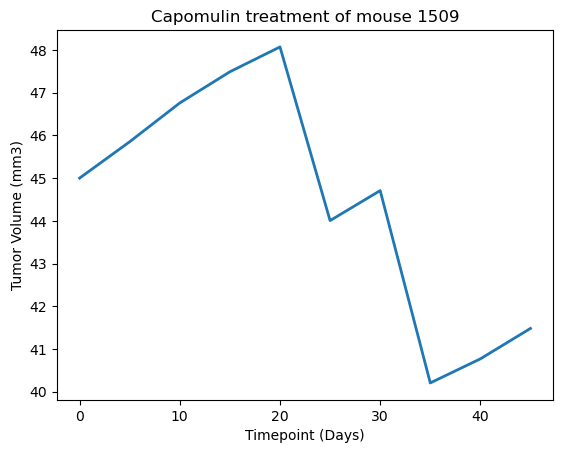

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

x_axis = lineplot_df["Timepoint"]
tumsiz = lineplot_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatment of mouse 1509')
plt.plot(x_axis, tumsiz, linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

C:\Users\twsuz\AppData\Local\Temp\ipykernel_5088\1500763211.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cap= cap_df.groupby(['Mouse ID']).mean()


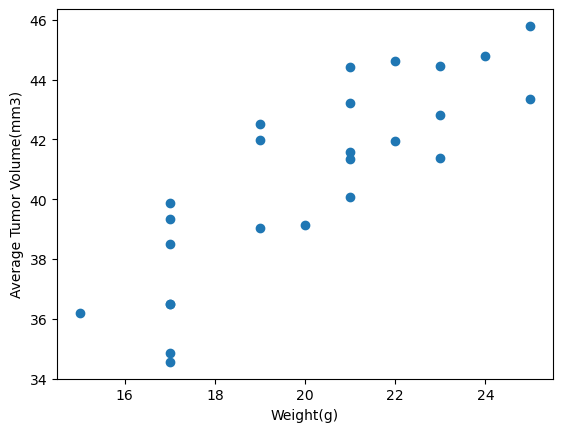

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

cap= cap_df.groupby(['Mouse ID']).mean()
plt.scatter(cap['Weight (g)'], cap['Tumor Volume (mm3)'])
plt.xlabel('Weight(g)')
plt.ylabel("Average Tumor Volume(mm3)")

plt.show()

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(cap['Weight (g)'],cap['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


In [24]:
table= st.linregress(cap['Weight (g)'], cap['Tumor Volume (mm3)'])
table

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [25]:
#linregress results

slope=0.9544396890241049
intercept=21.552160532685008
rvalue=0.8419363424694721
pvalue=1.3225722434712404e-07
stderr=0.12754359033201323
intercept_stderr=2.5909876867683455

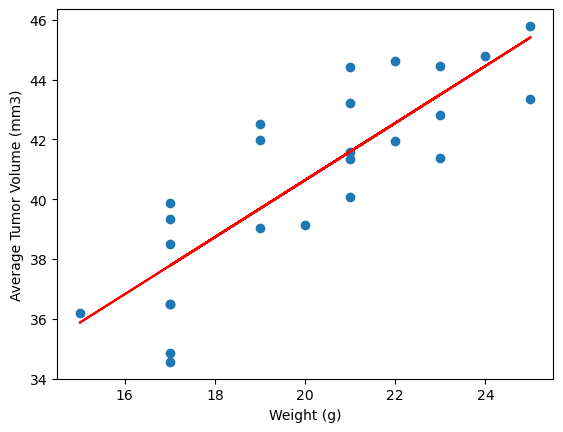

In [26]:
y_value= cap['Weight (g)']*slope+intercept
plt.scatter(cap['Weight (g)'], cap['Tumor Volume (mm3)'])
plt.plot(cap['Weight (g)'], y_value, color ="red")
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')

plt.show()